# STL - KRZYSZTOF KOWALSKI

## 0. Wczytanie danych

In [1]:
import pandas as pd
#!pip install statsmodels
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dane = pd.read_csv('CO2 dataset.csv', index_col = 'Decimal Date')

In [3]:
dane

,Year,Month,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
Decimal Date,,,,,,
1958.0411,1958,1,NaN,NaN,NaN,NaN
1958.1260,1958,2,NaN,NaN,NaN,NaN
1958.2027,1958,3,315.69,314.42,316.18,314.89
1958.2877,1958,4,317.45,315.15,317.30,314.98
1958.3699,1958,5,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...
2017.6219,2017,8,NaN,NaN,NaN,NaN
2017.7068,2017,9,NaN,NaN,NaN,NaN
2017.7890,2017,10,NaN,NaN,NaN,NaN


## 1. Przeprowadź dekompozycję szeregu czasowego za pomocą metody STL, korzystając z modułu dostępnego w bibliotece statsmodels. 

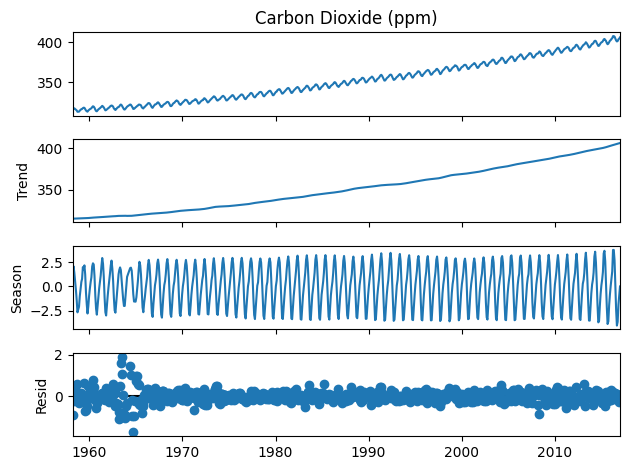

In [4]:
dane = dane.dropna()

stl = STL(dane['Carbon Dioxide (ppm)'], period = 12)
res = stl.fit()

fig = res.plot()
plt.show()

## 2. Przeprowadź testy dla różnych wartości parametrów period i seasonal, a następnie spisz swoje obserwacje z przeprowadzonych badań.

Badając wykresy widoczny jest wpływ parametru period, na wykres resyduów i sezonowości. Małe wartości tego parametru dają wielkie zaburzenia w wykresie rezydów. Optymalna wydaje się wartość 12.

Period: 2


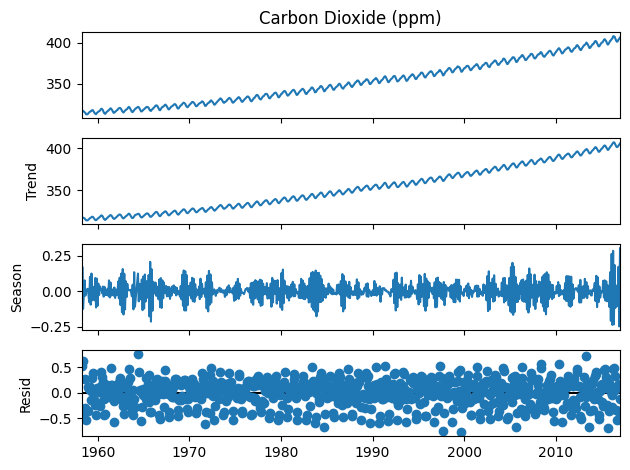

Period: 6


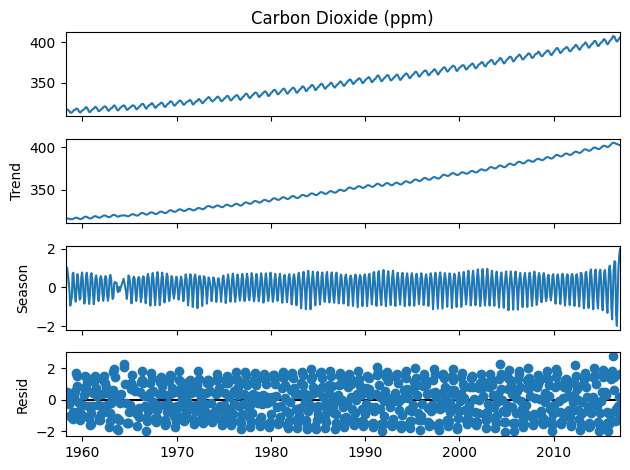

Period: 12


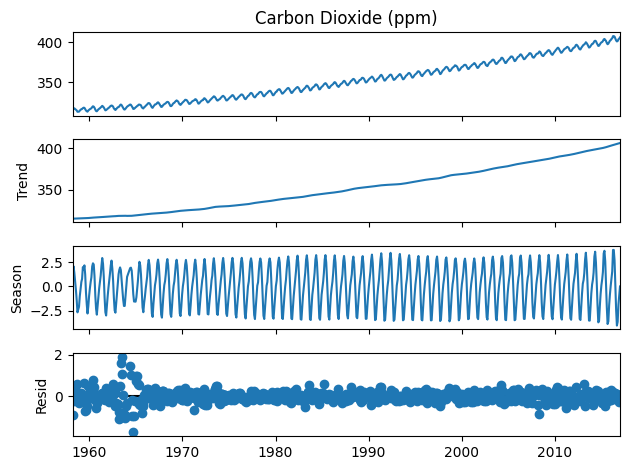

Period: 24


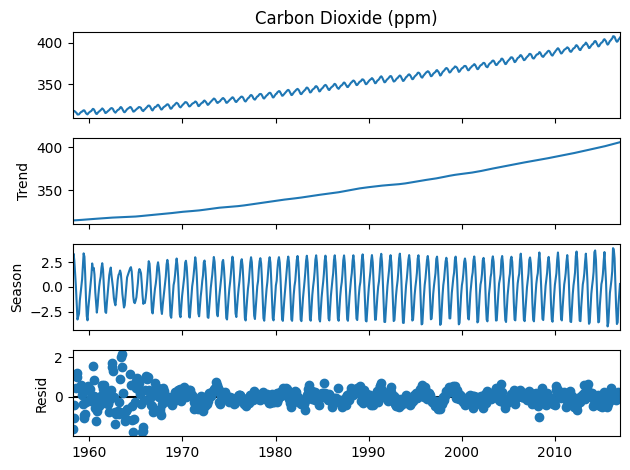

Period: 36


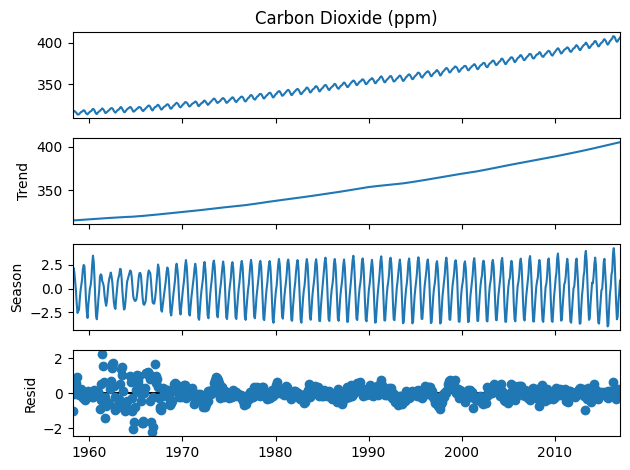

In [5]:
periods = [2, 6, 12, 24, 36] 
for period in periods:
    stl = STL(dane['Carbon Dioxide (ppm)'], period = period)
    res = stl.fit()
    fig = res.plot()
    print(f"Period: {period}")
    plt.show()

Wartości parametru seasonal również wpływa na wykresu rezydów i sezonowości. Ogromne zaburzenia są dla małych wartości seasonal, optymalna wydaje się być wartość 7.

Seasonal: 3


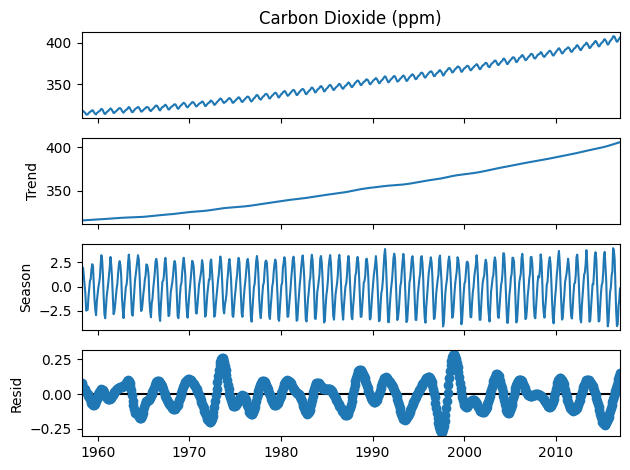

Seasonal: 7


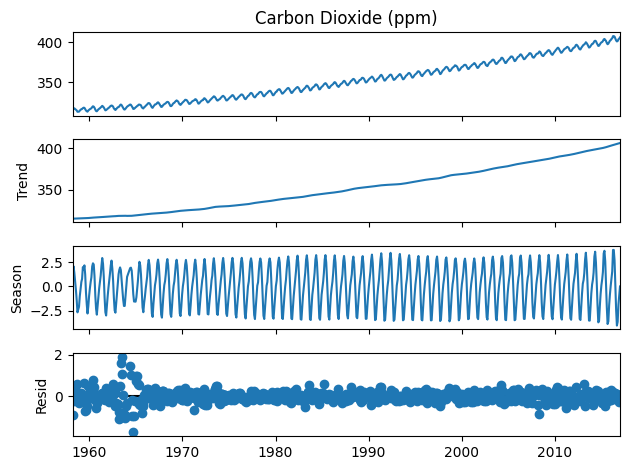

Seasonal: 13


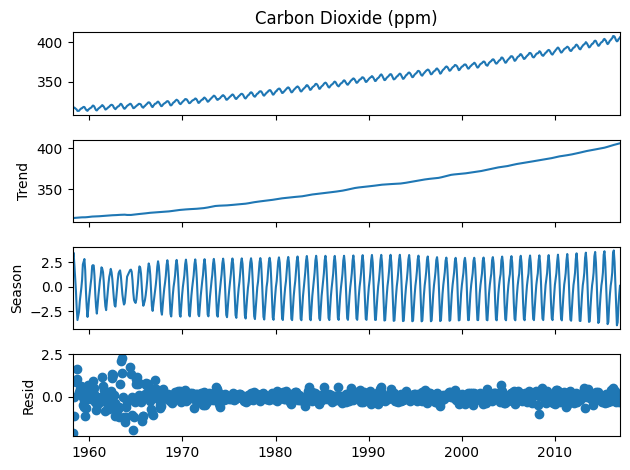

Seasonal: 25


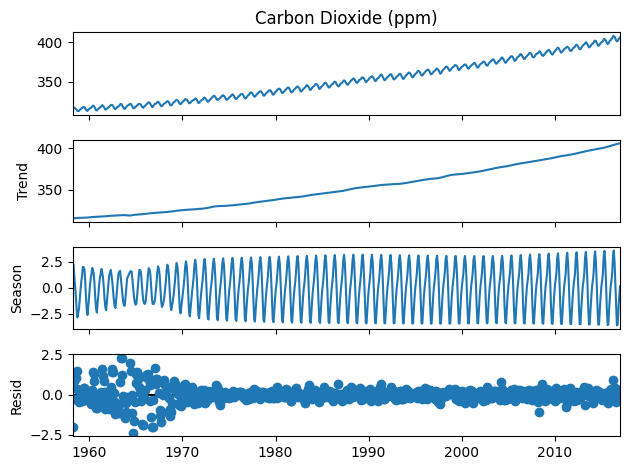

Seasonal: 37


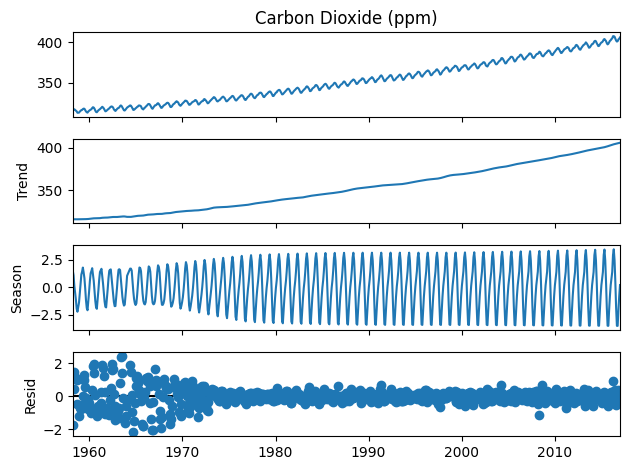

In [6]:
seasonals = [3, 7, 13, 25, 37]  
for seasonal in seasonals:
    stl = STL(dane['Carbon Dioxide (ppm)'], period = 12, seasonal = seasonal)
    res = stl.fit()
    fig = res.plot()
    print(f"Seasonal: {seasonal}")
    plt.show()

## 3. Zbadaj różnice w magnitudzie sezonowości pomiędzy stałą a zmienną w czasie (parametr seasonal_deg równy 0 oznacza stałą magnitudę sezonową w czasie). Przedstaw opis wyników swoich badań.

Różnica dla stałej a zmiennej magnitudzie w czasie jest znikoma. Widoczna jest różnica dla wykresu sezonowości (szczególnie na jego początku).

Seasonal deg values: 0


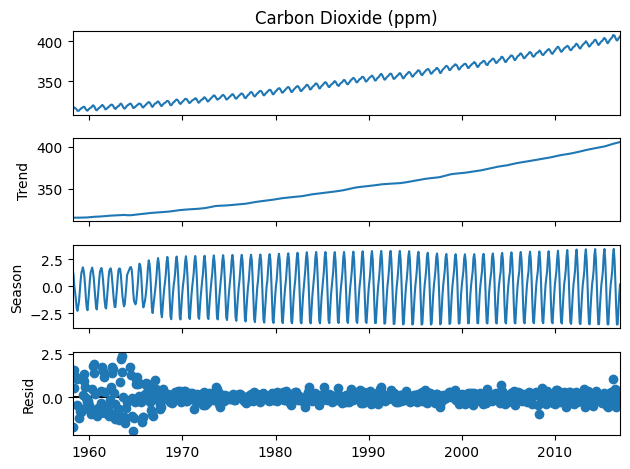

Seasonal deg values: 1


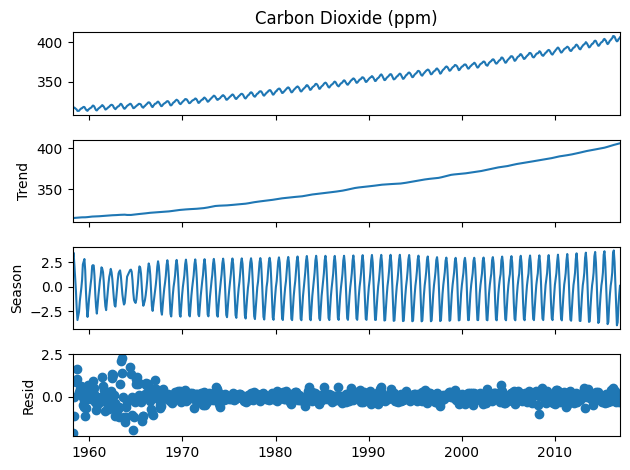

In [7]:
seasonal_deg_values = [0, 1]
for deg in seasonal_deg_values: 
    stl = STL(dane['Carbon Dioxide (ppm)'], period = 12, seasonal = 13, seasonal_deg = deg)
    res = stl.fit()
    print(f"Seasonal deg values: {deg}")
    fig = res.plot()
    plt.show()

## 4. Na podstawie wykonanych ćwiczeń z dekompozycji tradycyjnej oraz punktów 1-3 dzisiejszego ćwiczenia, zaleć, którą dekompozycję i dlaczego warto wykorzystać do generowania cech do modelu uczenia maszynowego.

Lepsze wydaje się skorzystanie z stl, zamiast tradycjnej metody dekompozycji. Pozwala ona lepiej radzic sobie z wartościami odstającymi, co wpływa na sezonowość oraz rezydua. Ustawienie parametru odpowiadającego za zmienną magnitude w czasie pozwala na lepsze dopasowanie się do danych. W przypadku występowania wartości brakujących lepszym rozwiązaniem będzie skorzystanie z tradycyjnych metod dekompozycji.

## 5. Dokonaj interpretacji trendu, sezonowości oraz reszt dla dekompozycji, która Twoim zdaniem przynosi najbardziej optymalne wyniki.

Bazując na powyższych uzasadnieniach postanowiłem na wybór parametrów widocznych poniżej. Uważam, że najlepiej dopasowują się do analizowanego zbioru.

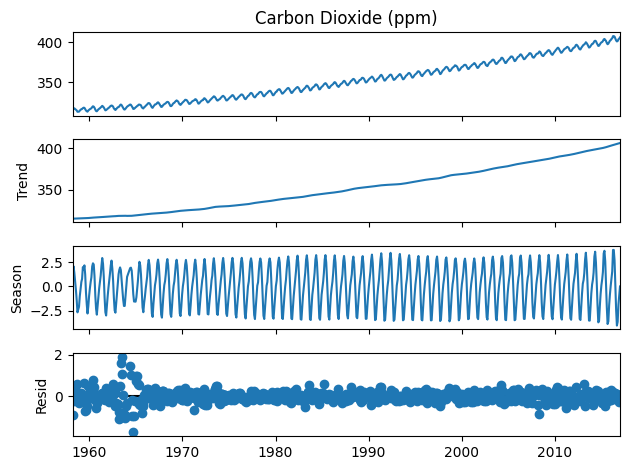

In [8]:
stl = STL(dane['Carbon Dioxide (ppm)'], period = 12, seasonal = 7, seasonal_deg = 1)
res = stl.fit()

fig = res.plot()
plt.show()

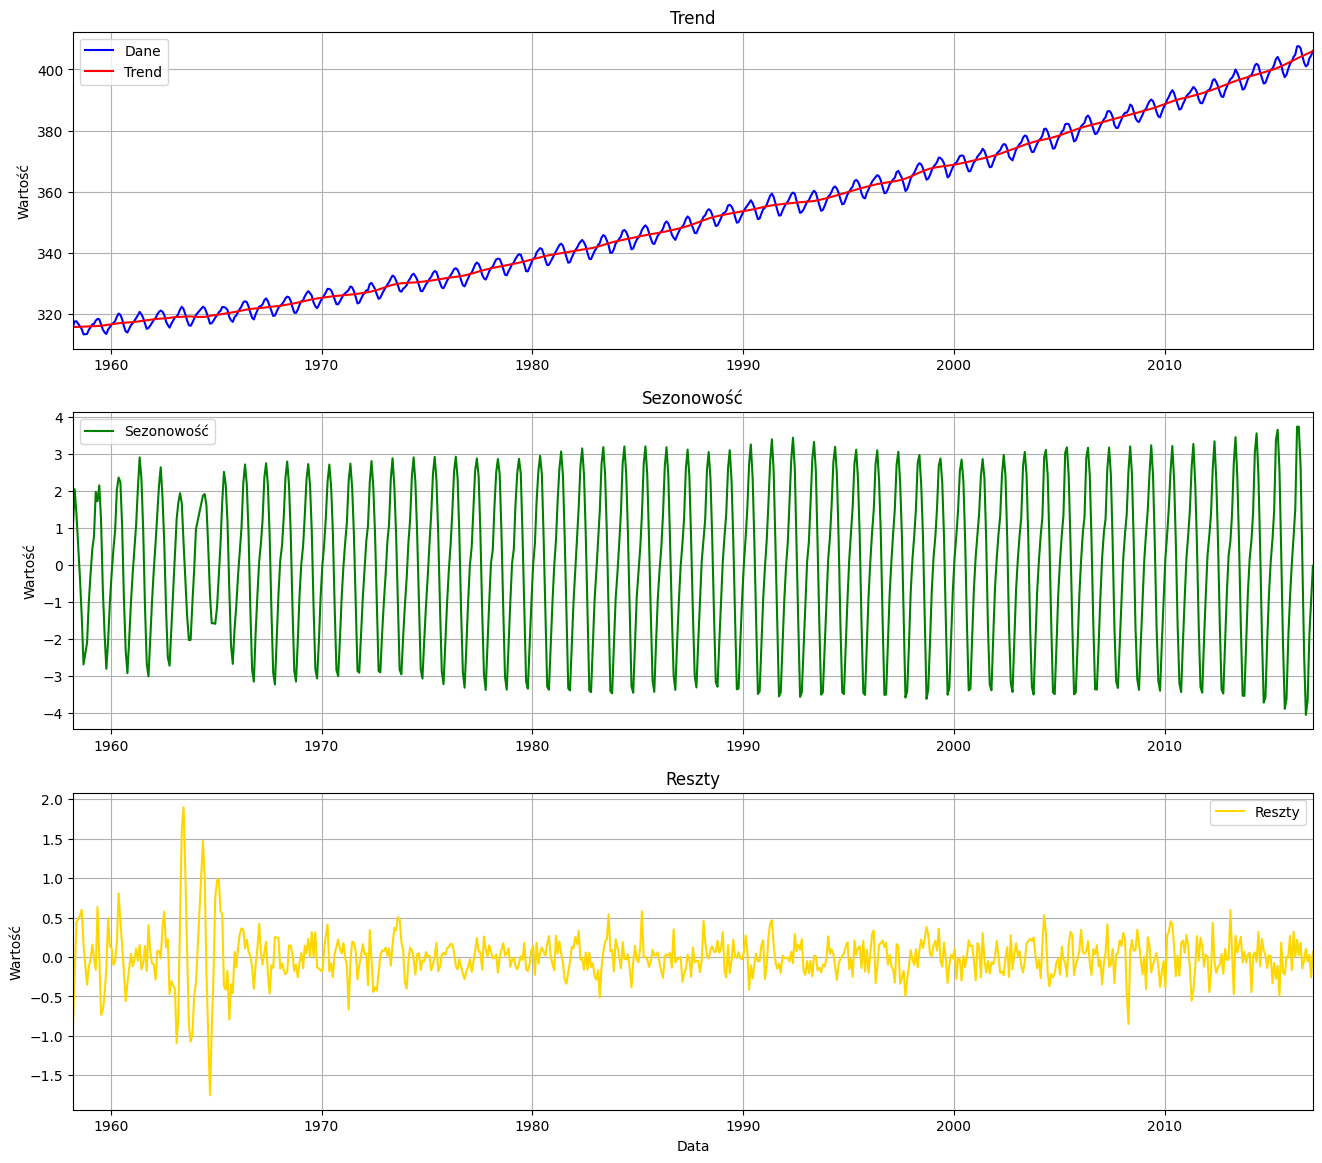

In [9]:
fig, ax = plt.subplots(3, 1, figsize = [16, 14])
ax[0].plot(dane.index, dane['Carbon Dioxide (ppm)'], label = 'Dane', color = 'blue')
ax[0].plot(dane.index, res.trend, label = 'Trend', color = 'red')
ax[0].set_ylabel('Wartość')
ax[0].set_title('Trend')
ax[0].set_xlim(np.min(dane.index), np.max(dane.index))
ax[0].legend()
ax[0].grid(True)

ax[1].plot(dane.index, res.seasonal, label = 'Sezonowość', color = 'green')
ax[1].set_ylabel('Wartość')
ax[1].set_title('Sezonowość')
ax[1].set_xlim(np.min(dane.index), np.max(dane.index))
ax[1].legend()
ax[1].grid(True)

ax[2].plot(dane.index, res.resid, label = 'Reszty', color = 'gold')
ax[2].set_xlabel('Data')
ax[2].set_ylabel('Wartość')
ax[2].set_title('Reszty')
ax[2].set_xlim(np.min(dane.index), np.max(dane.index))
ax[2].legend()
ax[2].grid(True)